## Overview of Training Neural Networks

*Training a neural network involves three key steps: **Forward Propagation**, **Loss Calculation**, and **Backpropagation**. Let's break each one down in detail with examples and diagrams where necessary.*

### 1. **Forward Propagation**

*This is the process of passing input data through the network to compute the output (predictions). Each layer applies a set of operations (weights, biases, and activation functions) to the input.*

#### Steps in Forward Propagation:
##### Input Layer:

*The input features are passed into the network.*

##### Hidden Layers:
*Each neuron in a layer computes a weighted sum of inputs and applies an activation function:*
$$
z= 
i
∑
​
 w 
i
​
 ⋅x 
i
​
 +b
$$

where

𝑤
𝑖
​
  = weights, 
𝑥
𝑖
​
  = Input  Features, 
𝑏 = bias, 
𝑓 = Activation Function.


##### Output Layer:
*The final layer outputs predictions based on the task (e.g., probabilities for classification).*

### 2. **Loss Functions**

*Loss functions measure how far the predicted outputs are from the true values. This is the error the network tries to minimize.*

#### Common Loss Functions:

* **Mean Squared Error** (MSE): Used for regression tasks.
  $$MSE = 1/n * Σ(yi - ŷi)^2$$

where 
𝑦𝑖= true value, 
𝑦^𝑖  = predicted value.

* **Cross-Entropy Loss**: Used for classification tasks.
  $$Loss = - Σ(yi * log(ŷi))$$

### 3. **Backpropagation**
*Backpropagation is the process of updating the weights and biases of the network based on the computed loss. It involves calculating gradients and using them to adjust parameters.*

#### Steps in Backpropagation:
* **Compute Gradients:**
*Calculate the derivative of the loss with respect to each weight and bias using the chain rule.*

* **Update Weights and Biases:**
*Use an optimization algorithm (e.g., **Gradient Descent**) to adjust the parameters:*
$$w = w - η * ∂Loss/∂w$$
where 
𝜂= learning rate.

**Gradient Descent Process:**

*Learning Rate* (𝜂): *Controls the step size for updates. A high value can overshoot, while a low value can make training very slow.*

# Diagram: Training Process
Input -> Forward Propagation -> Compute Loss -> Backpropagation -> Update Weights -> Repeat


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Sample Data
X = tf.constant([[1.0, 2.0], [2.0, 3.0]], dtype=tf.float32)
y = tf.constant([[1.0], [0.0]], dtype=tf.float32)

# Model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))
])

# Compile the Model
model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy')

# Train the Model
history = model.fit(X, y, epochs=10, verbose=1)

# Predict
predictions = model.predict(X)
print("Predictions:", predictions)


Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.8505
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8276
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8135
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8045
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7984
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7940
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7905
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.7875
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7849
Epoch 10/10
1/1 [==============================] - 0s 68ms/step
Predictions: [[0.36689654]
 [0.4273828 ]]


# Key Takeaways
**Forward Propagation**: Computes predictions from input data.

**Loss Functions**: Measure the error between predictions and true values.

**Backpropagation**: Updates weights and biases to minimize the loss.

# Doubts:

1. **How Are Weights Initialized?**
*Weights are typically initialized randomly but following specific strategies depending on the network architecture and activation functions. The goal is to ensure the network starts with diverse and meaningful computations across neurons.*

* Random Initialization
* Zero Initialization (Not Recommended)
* He Initialization (Good for ReLU)
* Xavier Initialization (Good for Sigmoid/Tanh)
* Uniform Initialization
* Learned Initialization (Advanced)

**He Initialization (Good for ReLU):**

Proposed for layers using the ReLU activation function.
Weights are drawn from:

$$ w \sim N(0, \sqrt\frac{2}{{n_{in}}}) $$

*where, $$𝑛_in$$ is the number of inputs to the neuron.*



In [6]:
initializer = tf.keras.initializers.HeNormal()
Dense(128, activation='relu', kernel_initializer=initializer)


**Xavier Initialization (Good for Sigmoid/Tanh):**

* Designed for sigmoid or tanh activations.
* Weights are drawn from:

$$ w \sim N(0, \frac{1}{\sqrt{n_{in}}}) $$



In [8]:
initializer = tf.keras.initializers.GlorotNormal()
Dense(128, activation='tanh', kernel_initializer=initializer)


In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Model with explicit initializer
model = Sequential([
    Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(100,)),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               12928     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,218
Trainable params: 14,218
Non-trainable params: 0
_________________________________________________________________


## How to Inspect Initial Weights?

In [10]:
# Get weights of a layer
weights, biases = model.layers[0].get_weights()
print("Weights:", weights)
print("Biases:", biases)


Weights: [[ 0.09996161  0.04050045  0.11920759 ... -0.27669728 -0.2849286
  -0.05255811]
 [ 0.0992579   0.09588108 -0.20229694 ...  0.09494433 -0.14468522
   0.09940039]
 [-0.00278274  0.14885733 -0.14356105 ... -0.06226705 -0.17194672
  -0.09602608]
 ...
 [ 0.25369704 -0.09605747  0.01071828 ...  0.09074322  0.2503167
  -0.23870263]
 [-0.26035127  0.05077142 -0.10826821 ...  0.00947933 -0.01520655
   0.3031882 ]
 [ 0.04921675  0.1655898  -0.11730015 ...  0.0822759   0.07349493
   0.00281883]]
Biases: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


2. # The Chain Rule in Neural Networks

*The chain rule is a fundamental concept in calculus used extensively in neural networks during backpropagation to compute gradients. It allows us to calculate the derivative of a composite function by breaking it into simpler components.*

3. # Gradients:
*In the context of deep learning and neural networks, **gradients** are mathematical quantities that represent the **rate of change** of a function (usually the loss function) with respect to its parameters (weights and biases). Gradients play a crucial role in optimization algorithms like **Stochastic Gradient Descent** (SGD) and **Adam** because they guide the model on how to update its parameters to minimize the loss.*


*A **gradient** is a vector of partial derivatives. It tells us the direction and rate of change of a function.*

*Gradients are used in **backpropagation**, where the errors are propagated backward through the network to calculate how each **weight** and **bias** should be updated to **minimize the loss**.*

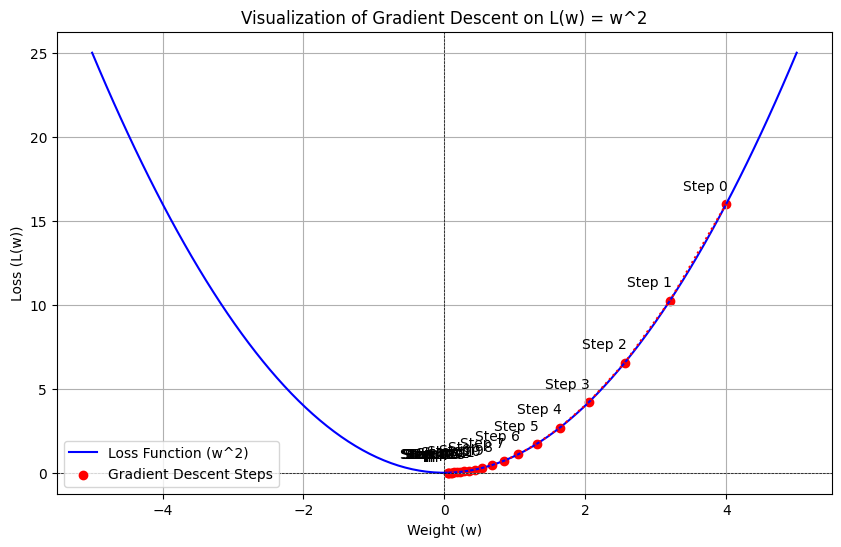

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple quadratic loss function: L(w) = w^2
def loss_function(w):
    return w**2

# Define the gradient of the loss function: dL/dw = 2w
def gradient(w):
    return 2 * w

# Gradient descent parameters
learning_rate = 0.1
iterations = 20
initial_weight = 4.0

# Lists to store weights and corresponding loss values
weights = [initial_weight]
losses = [loss_function(initial_weight)]

# Perform Gradient Descent
w = initial_weight
for i in range(iterations):
    grad = gradient(w)  # Compute the gradient
    w = w - learning_rate * grad  # Update the weight
    weights.append(w)
    losses.append(loss_function(w))

# Plotting
plt.figure(figsize=(10, 6))

# Plot the loss function
w_values = np.linspace(-5, 5, 100)  # Range of weights
plt.plot(w_values, loss_function(w_values), label="Loss Function (w^2)", color="blue")

# Plot gradient descent steps
plt.scatter(weights, losses, color="red", label="Gradient Descent Steps")
plt.plot(weights, losses, color="red", linestyle="dotted")

# Annotate steps
for i in range(len(weights)):
    plt.annotate(f"Step {i}", (weights[i], losses[i]), textcoords="offset points", xytext=(-15, 10), ha="center")

# Labels and title
plt.xlabel("Weight (w)")
plt.ylabel("Loss (L(w))")
plt.title("Visualization of Gradient Descent on L(w) = w^2")
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)
plt.axvline(0, color="black", linestyle="--", linewidth=0.5)
plt.legend()
plt.grid(True)

plt.show()


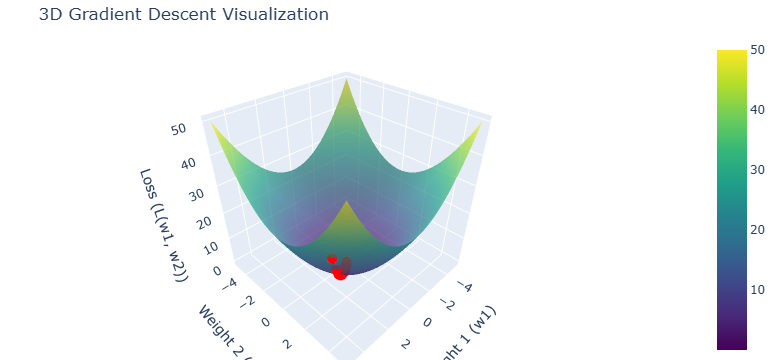

In [18]:
import numpy as np
import plotly.graph_objects as go

# Define the 3D loss function: L(w1, w2) = w1^2 + w2^2
def loss_function(w1, w2):
    return w1**2 + w2**2

# Define the gradient of the loss function
def gradient(w1, w2):
    grad_w1 = 2 * w1
    grad_w2 = 2 * w2
    return grad_w1, grad_w2

# Gradient descent parameters
learning_rate = 0.1
iterations = 20
initial_w1, initial_w2 = 4.0, 3.0

# Lists to store weights and corresponding loss values
w1_values = [initial_w1]
w2_values = [initial_w2]
loss_values = [loss_function(initial_w1, initial_w2)]

# Perform Gradient Descent
w1, w2 = initial_w1, initial_w2
for i in range(iterations):
    grad_w1, grad_w2 = gradient(w1, w2)  # Compute gradients
    w1 -= learning_rate * grad_w1       # Update w1
    w2 -= learning_rate * grad_w2       # Update w2
    w1_values.append(w1)
    w2_values.append(w2)
    loss_values.append(loss_function(w1, w2))

# Create a grid for the 3D surface plot
w1_grid = np.linspace(-5, 5, 100)
w2_grid = np.linspace(-5, 5, 100)
w1_grid, w2_grid = np.meshgrid(w1_grid, w2_grid)
loss_grid = loss_function(w1_grid, w2_grid)

# Create the 3D surface plot
surface = go.Surface(x=w1_grid, y=w2_grid, z=loss_grid, colorscale="Viridis", opacity=0.7)

# Create the gradient descent path as a 3D scatter plot
path = go.Scatter3d(
    x=w1_values,
    y=w2_values,
    z=loss_values,
    mode="markers+lines",
    marker=dict(size=6, color="red"),
    line=dict(color="red", width=2),
    name="Gradient Descent Path"
)

# Combine the surface and path in one figure
fig = go.Figure(data=[surface, path])

# Layout settings
fig.update_layout(
    title="3D Gradient Descent Visualization",
    scene=dict(
        xaxis_title="Weight 1 (w1)",
        yaxis_title="Weight 2 (w2)",
        zaxis_title="Loss (L(w1, w2))",
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the plot
fig.show()
